<a href="https://colab.research.google.com/github/r5-jun/PublicBigData/blob/main/1_%EC%84%9C%EA%B5%AC_%EA%B5%90%ED%86%B5%EC%82%AC%EA%B3%A0_EDA_checkpoint_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# ★ 서구내 거주 연령대

In [ ]:
stay = pd.read_csv('C:/Users/user/Desktop/서구인구현황(1단위).csv',encoding='euc-kr')
stay

,행정구역,연령대,서구
0,2021년07월_계_0세,0,359
1,2021년07월_계_1세,1,456
2,2021년07월_계_2세,2,520
3,2021년07월_계_3세,3,634
4,2021년07월_계_4세,4,770
...,...,...,...
96,2021년07월_계_96세,96,22
97,2021년07월_계_97세,97,22
98,2021년07월_계_98세,98,16
99,2021년07월_계_99세,99,7


In [ ]:
stay.drop('행정구역',axis=1,inplace=True)
stay

,연령대,서구
0,0,359
1,1,456
2,2,520
3,3,634
4,4,770
...,...,...
96,96,22
97,97,22
98,98,16
99,99,7


### - 연령대 범주화 하기

In [ ]:
stay_age_category = []

for i in stay['연령대']:
    if i<=5:
        stay_age_category.append('영유아')
    elif i<=12:
        stay_age_category.append('아동')
    elif i<=18:
        stay_age_category.append('청소년')
    elif i<=29:
        stay_age_category.append('청년')
    elif i<=49:
        stay_age_category.append('중년')
    elif i<=64:
        stay_age_category.append('장년')
    else:
        stay_age_category.append('노년')

In [ ]:
stay_age_category

['영유아',
 '영유아',
 '영유아',
 '영유아',
 '영유아',
 '영유아',
 '아동',
 '아동',
 '아동',
 '아동',
 '아동',
 '아동',
 '아동',
 '청소년',
 '청소년',
 '청소년',
 '청소년',
 '청소년',
 '청소년',
 '청년',
 '청년',
 '청년',
 '청년',
 '청년',
 '청년',
 '청년',
 '청년',
 '청년',
 '청년',
 '청년',
 '중년',
 '중년',
 '중년',
 '중년',
 '중년',
 '중년',
 '중년',
 '중년',
 '중년',
 '중년',
 '중년',
 '중년',
 '중년',
 '중년',
 '중년',
 '중년',
 '중년',
 '중년',
 '중년',
 '중년',
 '장년',
 '장년',
 '장년',
 '장년',
 '장년',
 '장년',
 '장년',
 '장년',
 '장년',
 '장년',
 '장년',
 '장년',
 '장년',
 '장년',
 '장년',
 '노년',
 '노년',
 '노년',
 '노년',
 '노년',
 '노년',
 '노년',
 '노년',
 '노년',
 '노년',
 '노년',
 '노년',
 '노년',
 '노년',
 '노년',
 '노년',
 '노년',
 '노년',
 '노년',
 '노년',
 '노년',
 '노년',
 '노년',
 '노년',
 '노년',
 '노년',
 '노년',
 '노년',
 '노년',
 '노년',
 '노년',
 '노년',
 '노년',
 '노년',
 '노년',
 '노년']

In [ ]:
stay['연령층'] = stay_age_category

In [ ]:
stay.drop('연령대',axis=1,inplace=True)
stay

,서구,연령층
0,359,영유아
1,456,영유아
2,520,영유아
3,634,영유아
4,770,영유아
...,...,...
96,22,노년
97,22,노년
98,16,노년
99,7,노년


In [ ]:
stay['서구']

0      359
1      456
2      520
3      634
4      770
      ... 
96      22
97      22
98      16
99       7
100     32
Name: 서구, Length: 101, dtype: object

In [ ]:
stay['서구'] = stay['서구'].apply(lambda x: x.replace(",","")) 
# apply 서구 빼내면 리스트로 나오는데 한 줄씩 검사해주세요
# lambda 임시 함수 
# 한 줄씩 들고 나온게 = x = 369가 나오면 replace 콤마를 빈 칸으로 나오게 해라 (즉, 콤마 삭제해라)

In [ ]:
stay['서구_int'] = pd.to_numeric(stay['서구'])
# 서구를 int형으로 바꿔라

In [ ]:
stay['서구_int']

0      359
1      456
2      520
3      634
4      770
      ... 
96      22
97      22
98      16
99       7
100     32
Name: 서구_int, Length: 101, dtype: int64

In [ ]:
stay = stay.drop(['서구'], axis=1)

In [ ]:
stay

,연령층,서구_int
0,영유아,359
1,영유아,456
2,영유아,520
3,영유아,634
4,영유아,770
...,...,...
96,노년,22
97,노년,22
98,노년,16
99,노년,7


In [ ]:
stay_pd = stay.groupby('연령층', as_index=False ).sum()
stay_pd

,연령층,서구_int
0,노년,39131
1,아동,6254
2,영유아,3582
3,장년,50852
4,중년,38995
5,청년,22160
6,청소년,6296


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rc('font',family='NanumGothic')
plt.rc('font',family='NanumGothic')

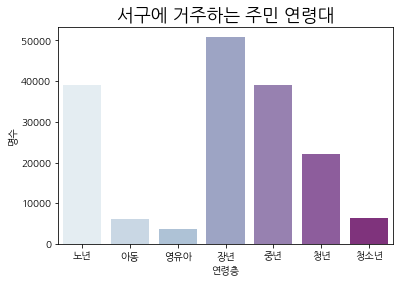

In [ ]:
sns.set_palette("pastel")
sns.barplot(x="연령층", y="서구_int", data=stay_pd, alpha=0.9, palette="BuPu")
plt.title("서구에 거주하는 주민 연령대", fontsize = "18")
plt.xlabel("연령층")
plt.ylabel("명수")
plt.show()

# ★ 서구내 교통사고 데이터

In [ ]:
data = pd.read_excel('C:/Users/user/Desktop/공빅데_프로젝트/데이터/서구내교통사고.xlsx')
data

,사고번호,사고일시,사고연도,사고월,사고시간,요일,시군구,사고내용,사망자수,중상자수,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2018010200100023,2018년 1월 2일 02시,2018,1,2,화요일,대구광역시 서구 내당동,경상사고,0,0,...,맑음,교차로 - 교차로안,승용,남,60,상해없음,승용,남,56,경상
1,2018010200100127,2018년 1월 2일 09시,2018,1,9,화요일,대구광역시 서구 평리동,경상사고,0,0,...,맑음,단일로 - 기타,승용,남,64,상해없음,승합,남,61,상해없음
2,2018010200100240,2018년 1월 2일 13시,2018,1,13,화요일,대구광역시 서구 비산동,중상사고,0,1,...,맑음,단일로 - 기타,승용,남,58,상해없음,보행자,남,60,중상
3,2018010200100292,2018년 1월 2일 15시,2018,1,15,화요일,대구광역시 서구 내당동,경상사고,0,0,...,맑음,단일로 - 기타,승용,여,62,상해없음,승용,여,57,경상
4,2018010200100386,2018년 1월 2일 18시,2018,1,18,화요일,대구광역시 서구 중리동,경상사고,0,0,...,맑음,교차로 - 교차로안,이륜,남,18,부상신고,승용,남,62,경상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3581,2020123100100304,2020년 12월 31일 16시,2020,12,16,목요일,대구광역시 서구 평리동,경상사고,0,0,...,맑음,단일로 - 기타,승용,남,30,상해없음,보행자,여,8,경상
3582,2020123100100305,2020년 12월 31일 16시,2020,12,16,목요일,대구광역시 서구 이현동,경상사고,0,0,...,맑음,교차로 - 교차로안,화물,남,32,부상신고,승용,남,40,경상
3583,2020123100100363,2020년 12월 31일 17시,2020,12,17,목요일,대구광역시 서구 비산동,경상사고,0,0,...,맑음,교차로 - 교차로안,승용,남,64,상해없음,자전거,여,65,경상
3584,2020123100100483,2020년 12월 31일 19시,2020,12,19,목요일,대구광역시 서구 평리동,경상사고,0,0,...,맑음,교차로 - 교차로부근,승용,남,71,경상,승용,남,30,경상


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   사고번호        3586 non-null   int64 
 1   사고일시        3586 non-null   object
 2   사고연도        3586 non-null   int64 
 3   사고월         3586 non-null   int64 
 4   사고시간        3586 non-null   int64 
 5   요일          3586 non-null   object
 6   시군구         3586 non-null   object
 7   사고내용        3586 non-null   object
 8   사망자수        3586 non-null   int64 
 9   중상자수        3586 non-null   int64 
 10  경상자수        3586 non-null   int64 
 11  부상신고자수      3586 non-null   int64 
 12  사고유형        3586 non-null   object
 13  법규위반        3586 non-null   object
 14  노면상태        3586 non-null   object
 15  기상상태        3586 non-null   object
 16  도로형태        3586 non-null   object
 17  가해운전자 차종    3586 non-null   object
 18  가해운전자 성별    3586 non-null   object
 19  가해운전자 연령    3586 non-null   object
 20  가해운전자 상해

**피해운전자 연령 : object - 문자형에서 숫자형으로 바꿔야겠다   
이상치 제거해야하는데 없을 듯**  
  
**피해운전자 차종, 성별, 연령, 상해정도 결측치였던 경우를 보니 차량 단독 사고(안전운전불이행)인 경우였음  
즉, 해당 분석에서 사용할 수 없는 부분으로 삭제하게 될 것**

# 0. 결측값 유무

### - 가해자차종/성별/연령/상해정도가 없는 경우 단독 사고로 drop

In [ ]:
data = data.dropna(axis=0)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3505 entries, 0 to 3585
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   사고번호        3505 non-null   int64 
 1   사고일시        3505 non-null   object
 2   사고연도        3505 non-null   int64 
 3   사고월         3505 non-null   int64 
 4   사고시간        3505 non-null   int64 
 5   요일          3505 non-null   object
 6   시군구         3505 non-null   object
 7   사고내용        3505 non-null   object
 8   사망자수        3505 non-null   int64 
 9   중상자수        3505 non-null   int64 
 10  경상자수        3505 non-null   int64 
 11  부상신고자수      3505 non-null   int64 
 12  사고유형        3505 non-null   object
 13  법규위반        3505 non-null   object
 14  노면상태        3505 non-null   object
 15  기상상태        3505 non-null   object
 16  도로형태        3505 non-null   object
 17  가해운전자 차종    3505 non-null   object
 18  가해운전자 성별    3505 non-null   object
 19  가해운전자 연령    3505 non-null   object
 20  가해운전자 상해

### - 가해운전자 연령

In [ ]:
data['가해운전자 연령'].value_counts(ascending=True)

10       1
12       1
89       1
87       1
86       1
      ... 
51      97
63      98
57     100
60     108
미분류    114
Name: 가해운전자 연령, Length: 82, dtype: int64

=>가해자 미분류가 114개로 결측지 존재해서 해결해야함

In [ ]:
data = data[data['가해운전자 연령'] != '미분류']

In [ ]:
data['가해운전자 연령'].value_counts()

60    108
57    100
63     98
51     97
59     94
     ... 
10      1
12      1
86      1
87      1
89      1
Name: 가해운전자 연령, Length: 81, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3391 entries, 0 to 3585
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   사고번호        3391 non-null   int64 
 1   사고일시        3391 non-null   object
 2   사고연도        3391 non-null   int64 
 3   사고월         3391 non-null   int64 
 4   사고시간        3391 non-null   int64 
 5   요일          3391 non-null   object
 6   시군구         3391 non-null   object
 7   사고내용        3391 non-null   object
 8   사망자수        3391 non-null   int64 
 9   중상자수        3391 non-null   int64 
 10  경상자수        3391 non-null   int64 
 11  부상신고자수      3391 non-null   int64 
 12  사고유형        3391 non-null   object
 13  법규위반        3391 non-null   object
 14  노면상태        3391 non-null   object
 15  기상상태        3391 non-null   object
 16  도로형태        3391 non-null   object
 17  가해운전자 차종    3391 non-null   object
 18  가해운전자 성별    3391 non-null   object
 19  가해운전자 연령    3391 non-null   object
 20  가해운전자 상해

### - 피해운전자 연령

In [ ]:
data['피해운전자 연령'].value_counts(ascending=True)

1       1
88      1
89      1
91      1
4       1
     ... 
59     87
60     89
52     93
58     94
57    100
Name: 피해운전자 연령, Length: 90, dtype: int64

In [ ]:
data = data[data['피해운전자 연령'] != '미분류']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3379 entries, 0 to 3585
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   사고번호        3379 non-null   int64 
 1   사고일시        3379 non-null   object
 2   사고연도        3379 non-null   int64 
 3   사고월         3379 non-null   int64 
 4   사고시간        3379 non-null   int64 
 5   요일          3379 non-null   object
 6   시군구         3379 non-null   object
 7   사고내용        3379 non-null   object
 8   사망자수        3379 non-null   int64 
 9   중상자수        3379 non-null   int64 
 10  경상자수        3379 non-null   int64 
 11  부상신고자수      3379 non-null   int64 
 12  사고유형        3379 non-null   object
 13  법규위반        3379 non-null   object
 14  노면상태        3379 non-null   object
 15  기상상태        3379 non-null   object
 16  도로형태        3379 non-null   object
 17  가해운전자 차종    3379 non-null   object
 18  가해운전자 성별    3379 non-null   object
 19  가해운전자 연령    3379 non-null   object
 20  가해운전자 상해

### - 피해운전자 연령

In [ ]:
data['피해운전자 연령'].value_counts(ascending=True)

1       1
88      1
89      1
91      1
4       1
     ... 
59     87
60     89
52     93
58     94
57    100
Name: 피해운전자 연령, Length: 89, dtype: int64

### - 가해자차종/성별/연령/상해정도가 미분류인경우 이유가 불명확하므로 drop

In [ ]:
data["가해운전자 차종"].replace('기타불명',np.nan, inplace = True)
data = data.dropna(axis=0)

In [ ]:
data["가해운전자 차종"].value_counts()

승용             2193
이륜              429
화물              407
자전거             150
승합              113
건설기계             40
원동기              31
특수                5
개인형이동수단(PM)       5
Name: 가해운전자 차종, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3373 entries, 0 to 3585
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   사고번호        3373 non-null   int64 
 1   사고일시        3373 non-null   object
 2   사고연도        3373 non-null   int64 
 3   사고월         3373 non-null   int64 
 4   사고시간        3373 non-null   int64 
 5   요일          3373 non-null   object
 6   시군구         3373 non-null   object
 7   사고내용        3373 non-null   object
 8   사망자수        3373 non-null   int64 
 9   중상자수        3373 non-null   int64 
 10  경상자수        3373 non-null   int64 
 11  부상신고자수      3373 non-null   int64 
 12  사고유형        3373 non-null   object
 13  법규위반        3373 non-null   object
 14  노면상태        3373 non-null   object
 15  기상상태        3373 non-null   object
 16  도로형태        3373 non-null   object
 17  가해운전자 차종    3373 non-null   object
 18  가해운전자 성별    3373 non-null   object
 19  가해운전자 연령    3373 non-null   object
 20  가해운전자 상해

=> 최종 3373개가 되었음

# 1. 데이터 변환

**연령의 조건문을 위해서 연령 부분을 object에서 int 타입으로 변경한다**

In [ ]:
data['가해운전자 연령'] = data['가해운전자 연령'].astype(int)

In [ ]:
data['가해운전자 연령'] 

0       60
1       64
2       58
3       62
4       18
        ..
3581    30
3582    32
3583    64
3584    71
3585    68
Name: 가해운전자 연령, Length: 3373, dtype: int32

In [ ]:
data['가해운전자 연령'].describe()

count    3373.000000
mean       48.951675
std        15.832485
min         9.000000
25%        36.000000
50%        51.000000
75%        61.000000
max        89.000000
Name: 가해운전자 연령, dtype: float64

In [ ]:
data['피해운전자 연령'] = data['피해운전자 연령'].astype(int)

In [ ]:
data['피해운전자 연령']

0       56
1       61
2       60
3       57
4       62
        ..
3581     8
3582    40
3583    65
3584    30
3585    40
Name: 피해운전자 연령, Length: 3373, dtype: int32

In [ ]:
data['피해운전자 연령'].describe()

count    3373.000000
mean       47.210495
std        16.615894
min         1.000000
25%        34.000000
50%        49.000000
75%        60.000000
max        91.000000
Name: 피해운전자 연령, dtype: float64

**피해자/가해자 연령을 법적인 의미로 범주화**

![image.png](attachment:image.png)

### - 피해자 연령 범주화하기

In [ ]:
ages_category = []

for i in data['피해운전자 연령']:
    if i<=5:
        ages_category.append('영유아')
    elif i<=12:
        ages_category.append('아동')
    elif i<=18:
        ages_category.append('청소년')
    elif i<=29:
        ages_category.append('청년')
    elif i<=49:
        ages_category.append('중년')
    elif i<=64:
        ages_category.append('장년')
    else:
        ages_category.append('노년')

In [ ]:
ages_category

['장년',
 '장년',
 '장년',
 '장년',
 '장년',
 '장년',
 '중년',
 '청소년',
 '중년',
 '장년',
 '청년',
 '장년',
 '장년',
 '중년',
 '장년',
 '중년',
 '중년',
 '청년',
 '청년',
 '청년',
 '장년',
 '장년',
 '노년',
 '장년',
 '장년',
 '장년',
 '장년',
 '장년',
 '중년',
 '장년',
 '장년',
 '중년',
 '장년',
 '청년',
 '중년',
 '노년',
 '장년',
 '노년',
 '중년',
 '중년',
 '중년',
 '중년',
 '노년',
 '장년',
 '청년',
 '중년',
 '청소년',
 '중년',
 '노년',
 '노년',
 '장년',
 '장년',
 '중년',
 '중년',
 '장년',
 '노년',
 '장년',
 '중년',
 '청년',
 '노년',
 '장년',
 '청년',
 '중년',
 '중년',
 '장년',
 '장년',
 '중년',
 '중년',
 '청소년',
 '중년',
 '장년',
 '중년',
 '장년',
 '청년',
 '노년',
 '노년',
 '노년',
 '노년',
 '노년',
 '노년',
 '장년',
 '장년',
 '중년',
 '장년',
 '청년',
 '중년',
 '장년',
 '장년',
 '장년',
 '장년',
 '장년',
 '영유아',
 '장년',
 '장년',
 '장년',
 '노년',
 '중년',
 '중년',
 '중년',
 '중년',
 '노년',
 '중년',
 '장년',
 '중년',
 '중년',
 '장년',
 '노년',
 '노년',
 '아동',
 '중년',
 '중년',
 '노년',
 '중년',
 '장년',
 '장년',
 '중년',
 '장년',
 '중년',
 '장년',
 '중년',
 '장년',
 '장년',
 '노년',
 '중년',
 '장년',
 '장년',
 '청년',
 '장년',
 '중년',
 '장년',
 '중년',
 '노년',
 '장년',
 '청년',
 '중년',
 '중년',
 '중년',
 '청년',
 '청년',
 '중년',
 '장년',
 '청년',
 '

In [ ]:
data['피해운전자 연령층'] = ages_category

In [ ]:
data[:5]

,사고번호,사고일시,사고연도,사고월,사고시간,요일,시군구,사고내용,사망자수,중상자수,...,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,피해운전자 연령층
0,2018010200100023,2018년 1월 2일 02시,2018,1,2,화요일,대구광역시 서구 내당동,경상사고,0,0,...,교차로 - 교차로안,승용,남,60,상해없음,승용,남,56,경상,장년
1,2018010200100127,2018년 1월 2일 09시,2018,1,9,화요일,대구광역시 서구 평리동,경상사고,0,0,...,단일로 - 기타,승용,남,64,상해없음,승합,남,61,상해없음,장년
2,2018010200100240,2018년 1월 2일 13시,2018,1,13,화요일,대구광역시 서구 비산동,중상사고,0,1,...,단일로 - 기타,승용,남,58,상해없음,보행자,남,60,중상,장년
3,2018010200100292,2018년 1월 2일 15시,2018,1,15,화요일,대구광역시 서구 내당동,경상사고,0,0,...,단일로 - 기타,승용,여,62,상해없음,승용,여,57,경상,장년
4,2018010200100386,2018년 1월 2일 18시,2018,1,18,화요일,대구광역시 서구 중리동,경상사고,0,0,...,교차로 - 교차로안,이륜,남,18,부상신고,승용,남,62,경상,장년


### - 가해자 연령 분포

In [ ]:
hit_category = []

for i in data['가해운전자 연령']:
    if i<=5:
        hit_category.append('영유아')
    elif i<=12:
        hit_category.append('아동')
    elif i<=18:
        hit_category.append('청소년')
    elif i<=29:
        hit_category.append('청년')
    elif i<=49:
        hit_category.append('중년')
    elif i<=64:
        hit_category.append('장년')
    else:
        hit_category.append('노년')

In [ ]:
data['가해운전자 연령층'] = hit_category

In [ ]:
data[:5]

,사고번호,사고일시,사고연도,사고월,사고시간,요일,시군구,사고내용,사망자수,중상자수,...,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,피해운전자 연령층,가해운전자 연령층
0,2018010200100023,2018년 1월 2일 02시,2018,1,2,화요일,대구광역시 서구 내당동,경상사고,0,0,...,승용,남,60,상해없음,승용,남,56,경상,장년,장년
1,2018010200100127,2018년 1월 2일 09시,2018,1,9,화요일,대구광역시 서구 평리동,경상사고,0,0,...,승용,남,64,상해없음,승합,남,61,상해없음,장년,장년
2,2018010200100240,2018년 1월 2일 13시,2018,1,13,화요일,대구광역시 서구 비산동,중상사고,0,1,...,승용,남,58,상해없음,보행자,남,60,중상,장년,장년
3,2018010200100292,2018년 1월 2일 15시,2018,1,15,화요일,대구광역시 서구 내당동,경상사고,0,0,...,승용,여,62,상해없음,승용,여,57,경상,장년,장년
4,2018010200100386,2018년 1월 2일 18시,2018,1,18,화요일,대구광역시 서구 중리동,경상사고,0,0,...,이륜,남,18,부상신고,승용,남,62,경상,장년,청소년


# 2.EDA

### 2-1. 피해운전자 연령층

In [ ]:
data['피해운전자 연령층'].value_counts()

장년     1172
중년     1074
청년      525
노년      486
청소년      78
아동       34
영유아       4
Name: 피해운전자 연령층, dtype: int64

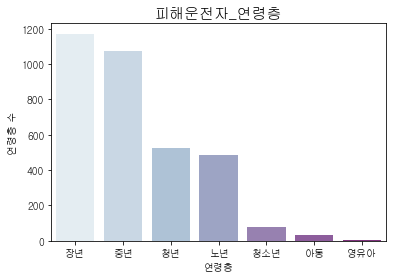

In [ ]:
import pandas as pd
import matplotlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
피해운전자_연령층=pd.DataFrame({'연령층':['장년','중년','청년','노년','청소년','아동','영유아'],
                         '연령층 수':[1172,1074,525,486,78,34,4]})
피해운전자_연령층
palette = sns.color_palette("bright")
sns.barplot(
    data= 피해운전자_연령층,
    x= "연령층",
    y= "연령층 수",
    alpha=0.9, 
    palette="BuPu"
)
plt.title('피해운전자_연령층',fontsize = "15")
plt.show()

**=>피해자 운전자가 장년>중년>청년>노년 순으로 많았다.  
서구의 거주 연령층을 확인 한 수 비율이든 적당한 기준을 세워서 비교할 필요가 있다.  
청소년, 아동, 영유아의 피해보다 연령층이 높은 피해자가 많았다.  
연령층이 높은 거주자가 많았을 수도 있지만, 연령층을 고려한 교통 사고 대책이 필요하다**

### 2-2. 가해운전자 연령층

In [ ]:
data['가해운전자 연령층'].value_counts()

장년     1304
중년      968
노년      546
청년      486
청소년      63
아동        6
Name: 가해운전자 연령층, dtype: int64

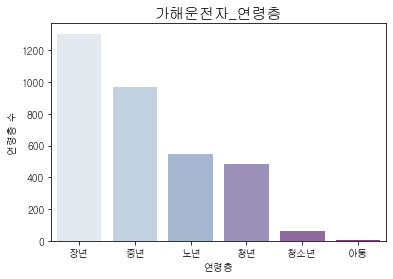

In [ ]:
import pandas as pd
import matplotlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
가해운전자_연령층=pd.DataFrame({'연령층':['장년','중년','노년','청년','청소년','아동'],
                         '연령층 수':[1304,968,546,486,63,6]})
가해운전자_연령층 
palette = sns.color_palette("bright")
sns.barplot(
    data= 가해운전자_연령층,
    x= "연령층",
    y= "연령층 수",
    alpha=0.9, 
    palette="BuPu"
)
plt.title('가해운전자_연령층',fontsize = "15")
plt.show()

**=> 가해운전자 연령층도 위와 같이 장년>중년>노년층이 많았다.  
서구 연령층이 장년이 가장 많은 것 같은데 확인이 필요하다.**

### 2-3. 사고 요일

In [ ]:
k1 = data["요일"].value_counts()
k1 = pd.DataFrame(k1)
k1 = k1.reset_index()
k1

,index,요일
0,금요일,538
1,목요일,531
2,화요일,524
3,월요일,497
4,토요일,484
5,수요일,460
6,일요일,339


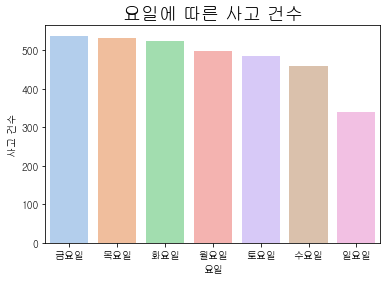

In [ ]:
sns.set_palette("pastel") # 색 지정
sns.barplot(x="index", y="요일", data=k1, alpha=0.9)
plt.title("요일에 따른 사고 건수", fontsize = "18")
plt.xlabel("요일")
plt.ylabel("사고 건수")
plt.show()

**=> 통행량을 확인해보면 더 좋겠지만, 위 그래프만 보면 요일별로 비슷한 분포를 보인다.  
일요일이 눈에 띄게 적은 건수를 보이는데 이것은 통행량을 먼저 확인해보아야한다.  
만약 통행량이 많은데 일요일에 사고가 적다면 더 자세히 분석해보아야한다.**

### 2-4. 사고유형 분석

차대차 / 차대사람 이쪽으로 해서 나눠야함

In [ ]:
type = data["사고유형"]
type.describe()
type.unique()

array(['차대차 - 측면충돌', '차대차 - 추돌', '차대사람 - 길가장자리구역통행중', '차대차 - 기타',
       '차대사람 - 차도통행중', '차대사람 - 횡단중', '차대사람 - 기타', '차대사람 - 보도통행중',
       '차대차 - 정면충돌', '차대차 - 후진중충돌'], dtype=object)

In [ ]:
type = type.replace(["차대차 - 측면충돌","차대차 - 추돌", "차대차 - 기타", "차대차 - 정면충돌", "차대차 - 후진중충돌"], "차대차")
type = type.replace(["차대사람 - 기타", "차대사람 - 횡단중", "차대사람 - 차도통행중", "차대사람 - 보도통행중", "차대사람 - 길가장자리구역통행중"], "차대사람")
type = type.replace(["차량단독 - 전도전복 - 전도"], "차량단독")
k2 = type.value_counts()

In [ ]:
k2 = type.value_counts()
k2 = pd.DataFrame(k2)
k2 = k2.reset_index()
k2

,index,사고유형
0,차대차,2771
1,차대사람,602


In [ ]:
data['type']=type

In [ ]:
data

,사고번호,사고일시,사고연도,사고월,사고시간,요일,시군구,사고내용,사망자수,중상자수,...,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,피해운전자 연령층,가해운전자 연령층,type
0,2018010200100023,2018년 1월 2일 02시,2018,1,2,화요일,대구광역시 서구 내당동,경상사고,0,0,...,남,60,상해없음,승용,남,56,경상,장년,장년,차대차
1,2018010200100127,2018년 1월 2일 09시,2018,1,9,화요일,대구광역시 서구 평리동,경상사고,0,0,...,남,64,상해없음,승합,남,61,상해없음,장년,장년,차대차
2,2018010200100240,2018년 1월 2일 13시,2018,1,13,화요일,대구광역시 서구 비산동,중상사고,0,1,...,남,58,상해없음,보행자,남,60,중상,장년,장년,차대사람
3,2018010200100292,2018년 1월 2일 15시,2018,1,15,화요일,대구광역시 서구 내당동,경상사고,0,0,...,여,62,상해없음,승용,여,57,경상,장년,장년,차대차
4,2018010200100386,2018년 1월 2일 18시,2018,1,18,화요일,대구광역시 서구 중리동,경상사고,0,0,...,남,18,부상신고,승용,남,62,경상,장년,청소년,차대차
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3581,2020123100100304,2020년 12월 31일 16시,2020,12,16,목요일,대구광역시 서구 평리동,경상사고,0,0,...,남,30,상해없음,보행자,여,8,경상,아동,중년,차대사람
3582,2020123100100305,2020년 12월 31일 16시,2020,12,16,목요일,대구광역시 서구 이현동,경상사고,0,0,...,남,32,부상신고,승용,남,40,경상,중년,중년,차대차
3583,2020123100100363,2020년 12월 31일 17시,2020,12,17,목요일,대구광역시 서구 비산동,경상사고,0,0,...,남,64,상해없음,자전거,여,65,경상,노년,장년,차대차
3584,2020123100100483,2020년 12월 31일 19시,2020,12,19,목요일,대구광역시 서구 평리동,경상사고,0,0,...,남,71,경상,승용,남,30,경상,중년,노년,차대차


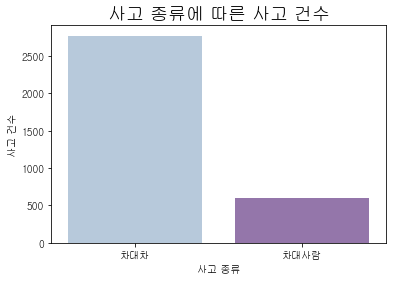

In [ ]:
sns.set_palette("pastel")
sns.barplot(x="index", y="사고유형", data=k2, alpha=0.9, palette="BuPu")
plt.title("사고 종류에 따른 사고 건수", fontsize = "18")
plt.xlabel("사고 종류")
plt.ylabel("사고 건수")
plt.show()

In [ ]:
k2.rename(columns={'index':'사고유형','사고유형':'사고건수'},inplace=True)
k2

,사고건수,사고건수
0,차대차,2771
1,차대사람,602


**=> 차대차가 차대사람보다 훨씬 많은 사고가 일어나지만?**  
**차대차보다 차대사람이 인명사고에 직결적이라 생각을 해서였음**  
**그렇다면 차대차, 차대사람의 사망비율 확인해봐야겠다**

In [ ]:
data['사고내용'].value_counts()

경상사고      2218
중상사고       896
부상신고사고     229
사망사고        30
Name: 사고내용, dtype: int64

#### 차대차 사고내용

In [ ]:
data

,사고번호,사고일시,사고연도,사고월,사고시간,요일,시군구,사고내용,사망자수,중상자수,...,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,피해운전자 연령층,가해운전자 연령층,type
0,2018010200100023,2018년 1월 2일 02시,2018,1,2,화요일,대구광역시 서구 내당동,경상사고,0,0,...,남,60,상해없음,승용,남,56,경상,장년,장년,차대차
1,2018010200100127,2018년 1월 2일 09시,2018,1,9,화요일,대구광역시 서구 평리동,경상사고,0,0,...,남,64,상해없음,승합,남,61,상해없음,장년,장년,차대차
2,2018010200100240,2018년 1월 2일 13시,2018,1,13,화요일,대구광역시 서구 비산동,중상사고,0,1,...,남,58,상해없음,보행자,남,60,중상,장년,장년,차대사람
3,2018010200100292,2018년 1월 2일 15시,2018,1,15,화요일,대구광역시 서구 내당동,경상사고,0,0,...,여,62,상해없음,승용,여,57,경상,장년,장년,차대차
4,2018010200100386,2018년 1월 2일 18시,2018,1,18,화요일,대구광역시 서구 중리동,경상사고,0,0,...,남,18,부상신고,승용,남,62,경상,장년,청소년,차대차
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3581,2020123100100304,2020년 12월 31일 16시,2020,12,16,목요일,대구광역시 서구 평리동,경상사고,0,0,...,남,30,상해없음,보행자,여,8,경상,아동,중년,차대사람
3582,2020123100100305,2020년 12월 31일 16시,2020,12,16,목요일,대구광역시 서구 이현동,경상사고,0,0,...,남,32,부상신고,승용,남,40,경상,중년,중년,차대차
3583,2020123100100363,2020년 12월 31일 17시,2020,12,17,목요일,대구광역시 서구 비산동,경상사고,0,0,...,남,64,상해없음,자전거,여,65,경상,노년,장년,차대차
3584,2020123100100483,2020년 12월 31일 19시,2020,12,19,목요일,대구광역시 서구 평리동,경상사고,0,0,...,남,71,경상,승용,남,30,경상,중년,노년,차대차


In [ ]:
data.query('type == "차대차"')['사고내용'].value_counts()

경상사고      1917
중상사고       654
부상신고사고     188
사망사고        12
Name: 사고내용, dtype: int64

#### 차대사람 사고내용

In [ ]:
data.query('type == "차대사람"')['사고내용'].value_counts()

경상사고      301
중상사고      242
부상신고사고     41
사망사고       18
Name: 사고내용, dtype: int64

### 2-4-2. 사고 유형별 중상사고 위험

In [ ]:
중상위험=pd.DataFrame({'타입':['차대차','차대사람'],
                         '중상사고 수':[654,242]})

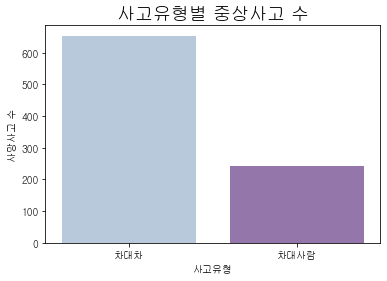

In [ ]:
sns.set_palette("pastel")
sns.barplot(x="타입", y="중상사고 수", data=중상위험, alpha=0.9, palette="BuPu")
plt.title("사고유형별 중상사고 수", fontsize = "18")
plt.xlabel("사고유형")
plt.ylabel("사망사고 수")
plt.show()

### 2-4-3. 사고 유형별 사망사고 위험

In [ ]:
사망위험=pd.DataFrame({'타입':['차대차','차대사람'],
                         '사망사고 수':[12,18]})

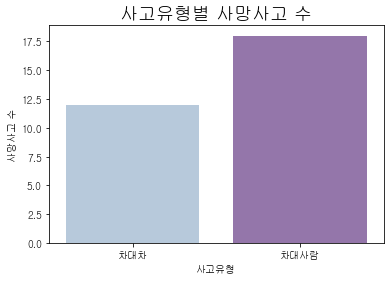

In [ ]:
sns.set_palette("pastel")
sns.barplot(x="타입", y="사망사고 수", data=사망위험, alpha=0.9, palette="BuPu")
plt.title("사고유형별 사망사고 수", fontsize = "18")
plt.xlabel("사고유형")
plt.ylabel("사망사고 수")
plt.show()

### 2-5. 법규위반

In [ ]:
data["법규위반"]

0            신호위반
1         안전거리미확보
2         안전운전불이행
3         안전운전불이행
4            신호위반
          ...    
3581      안전운전불이행
3582      안전거리미확보
3583      안전운전불이행
3584    교차로운행방법위반
3585        중앙선침범
Name: 법규위반, Length: 3373, dtype: object

In [ ]:
data2 = data["법규위반"]
data2.describe()

count        3373
unique         11
top       안전운전불이행
freq         1779
Name: 법규위반, dtype: object

In [ ]:
data2.unique()

array(['신호위반', '안전거리미확보', '안전운전불이행', '직진우회전진행방해', '교차로운행방법위반', '중앙선침범',
       '기타', '보행자보호의무위반', '과속', '불법유턴', '차로위반'], dtype=object)

In [ ]:
k3 = data2.value_counts()
k3 = pd.DataFrame(k3)
k3 = k3.reset_index()
k3

,index,법규위반
0,안전운전불이행,1779
1,안전거리미확보,513
2,신호위반,347
3,교차로운행방법위반,236
4,기타,141
5,직진우회전진행방해,92
6,중앙선침범,87
7,보행자보호의무위반,65
8,차로위반,56
9,불법유턴,38


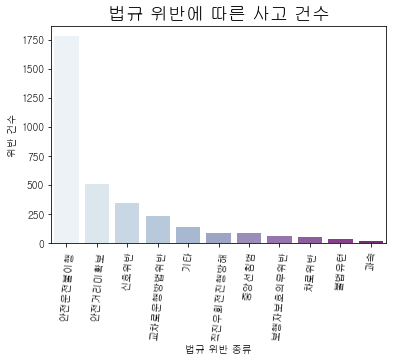

In [ ]:
sns.set_palette("pastel")
sns.barplot(x="index", y="법규위반", data=k3, alpha=0.9, palette="BuPu")
plt.title("법규 위반에 따른 사고 건수", fontsize = "18")
plt.xlabel("법규 위반 종류")
plt.ylabel("위반 건수")
plt.xticks(rotation = 85)
plt.show()

  
**안전불이행이란? 휴대전화, 담배, 라디오 조작, 졸음운전으로 인한 전방 주시 태만 사고,**  
**제동장치 조작 불량 사고, 핸들 과대조작 사고,**  
**차내 잡답 혹은 장난으로 인한 사고, 운전미숙으로 인한 사고, 난폭운전**


### 2-5-2. 성별에 따른 법규 위반 건수

굳이 할 필요가 있을까? 안할래

### 2-6. 기상상태

In [ ]:
data3 = data["기상상태"]
data3.describe()

count     3373
unique       6
top         맑음
freq      3150
Name: 기상상태, dtype: object

In [ ]:
k4 = data3.value_counts()
k4 = pd.DataFrame(k4)
k4 = k4.reset_index()
k4

,index,기상상태
0,맑음,3150
1,비,173
2,흐림,43
3,눈,4
4,기타,2
5,안개,1


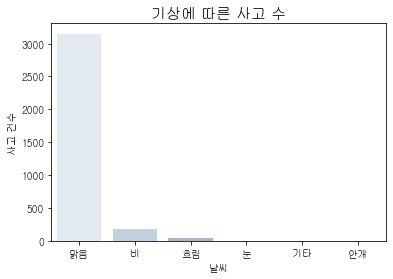

In [ ]:
sns.set_palette("pastel")
sns.barplot(x="index", y="기상상태", data=k4, alpha=0.9, palette="BuPu")
plt.title("기상에 따른 사고 수", fontsize = "15")
plt.xlabel("날씨")
plt.ylabel("사고 건수")
plt.show()

**=> 주로 맑은 날에 사고가 발생한다.  
비가 왔을 때 사고가 났다면 다른 방향으로 해결 해야할 수 있었다는 것을 알 수 있다.**

### 2-7. 가해운전자 차종

In [ ]:
data4 = data["가해운전자 차종"]

In [ ]:
k5 = data4.value_counts()
k5 = pd.DataFrame(k5)
k5 = k5.reset_index()
k5 = k5.replace('개인형이동수단(PM)','PM')
k5

,index,가해운전자 차종
0,승용,2193
1,이륜,429
2,화물,407
3,자전거,150
4,승합,113
5,건설기계,40
6,원동기,31
7,특수,5
8,PM,5


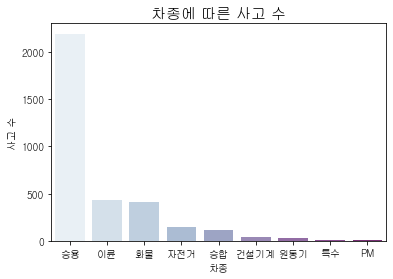

In [ ]:
sns.set_palette("pastel")
sns.barplot(x="index", y="가해운전자 차종", data=k5, alpha=0.9, palette="BuPu")
plt.title("차종에 따른 사고 수", fontsize = "15")
plt.xlabel("차종")
plt.ylabel("사고 수")
plt.show()

**=> 서구쪽 공장단지가 있어서 특수 차종이 있지 않을까 생각했지만,  
대다수 승용차로 나타나서 승용차 대상의 솔루션이 필요했다.**

### 2-8. 사고 시간

In [ ]:
data['사고시간']

0        2
1        9
2       13
3       15
4       18
        ..
3581    16
3582    16
3583    17
3584    19
3585    20
Name: 사고시간, Length: 3373, dtype: int64

In [ ]:
time_category = []

for i in data['사고시간']:
    if 6<=i<=18:
        time_category.append('주간')
    else:
        time_category.append('야간')

In [ ]:
time_category

['야간',
 '주간',
 '주간',
 '주간',
 '주간',
 '야간',
 '야간',
 '주간',
 '주간',
 '주간',
 '야간',
 '주간',
 '야간',
 '야간',
 '야간',
 '야간',
 '주간',
 '야간',
 '주간',
 '주간',
 '주간',
 '야간',
 '주간',
 '주간',
 '주간',
 '야간',
 '야간',
 '주간',
 '주간',
 '주간',
 '야간',
 '주간',
 '주간',
 '주간',
 '주간',
 '주간',
 '야간',
 '주간',
 '주간',
 '주간',
 '주간',
 '주간',
 '주간',
 '주간',
 '주간',
 '주간',
 '야간',
 '주간',
 '주간',
 '주간',
 '야간',
 '야간',
 '주간',
 '주간',
 '주간',
 '야간',
 '야간',
 '주간',
 '야간',
 '주간',
 '주간',
 '야간',
 '야간',
 '주간',
 '야간',
 '야간',
 '주간',
 '주간',
 '야간',
 '주간',
 '주간',
 '야간',
 '주간',
 '주간',
 '주간',
 '야간',
 '주간',
 '주간',
 '야간',
 '주간',
 '야간',
 '주간',
 '주간',
 '야간',
 '주간',
 '주간',
 '주간',
 '주간',
 '주간',
 '주간',
 '야간',
 '주간',
 '주간',
 '야간',
 '야간',
 '주간',
 '주간',
 '야간',
 '야간',
 '야간',
 '주간',
 '주간',
 '주간',
 '야간',
 '주간',
 '주간',
 '주간',
 '주간',
 '주간',
 '주간',
 '주간',
 '주간',
 '주간',
 '주간',
 '주간',
 '주간',
 '주간',
 '주간',
 '주간',
 '주간',
 '주간',
 '주간',
 '야간',
 '야간',
 '주간',
 '야간',
 '야간',
 '주간',
 '야간',
 '야간',
 '주간',
 '주간',
 '주간',
 '야간',
 '야간',
 '주간',
 '주간',
 '야간',
 '야간',
 '야간',
 '주간',
 '주간',
 '야간',

In [ ]:
from collections import Counter
result = Counter(time_category)
print(result)

result = Counter(time_category).values()
print(result)

Counter({'주간': 2311, '야간': 1062})
dict_values([1062, 2311])


In [ ]:
시간대_사고수 = pd.DataFrame({'시간대':['주간','야간'],
                         '사고 수':[1147,2439]})
시간대_사고수

,시간대,사고 수
0,주간,1147
1,야간,2439


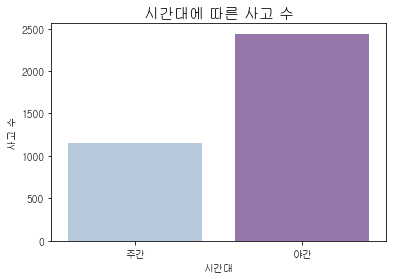

In [ ]:
sns.set_palette("pastel")
sns.barplot(x="시간대", y="사고 수", data=시간대_사고수, alpha=0.9, palette="BuPu")
plt.title("시간대에 따른 사고 수", fontsize = "15")
plt.xlabel("시간대")
plt.ylabel("사고 수")
plt.show()

**=> 지금 당장에 야간이 많아 보이는데 당연한 결과 일 수 있음.  
하지만 현재 주제에 맞는 그래프 모양이 아니라고 판단.  
전체적으로 범주화를 다시해서 확인해 볼 필요가 있음**

### 2-9. 사고 월

In [ ]:
data['사고월']

0        1
1        1
2        1
3        1
4        1
        ..
3581    12
3582    12
3583    12
3584    12
3585    12
Name: 사고월, Length: 3373, dtype: int64

In [ ]:
month = data['사고월'].value_counts()
month= pd.DataFrame(month)
month = month.reset_index()
month

,index,사고월
0,12,305
1,6,304
2,5,298
3,11,297
4,10,296
5,4,292
6,1,289
7,3,278
8,9,275
9,8,262


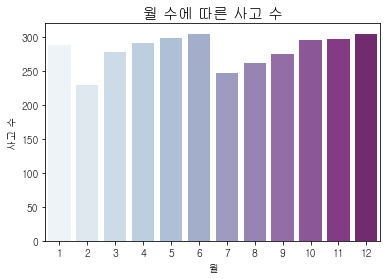

In [ ]:
sns.set_palette("pastel")
sns.barplot(x="index", y="사고월", data=month, alpha=0.9, palette="BuPu")
plt.title("월 수에 따른 사고 수", fontsize = "15")
plt.xlabel("월")
plt.ylabel("사고 수")
plt.show()

**=> 대체로 200~300건이 발생하므로 월 별로 다를 바가 없다고 생각이 된다**

### 2-10. 성별

In [ ]:
data['피해운전자 성별']

0       남
1       남
2       남
3       여
4       남
       ..
3581    여
3582    남
3583    여
3584    남
3585    남
Name: 피해운전자 성별, Length: 3373, dtype: object

In [ ]:
sex = data['피해운전자 성별'].value_counts()
sex = pd.DataFrame(sex)
sex = sex.reset_index()
sex

,index,피해운전자 성별
0,남,2503
1,여,870


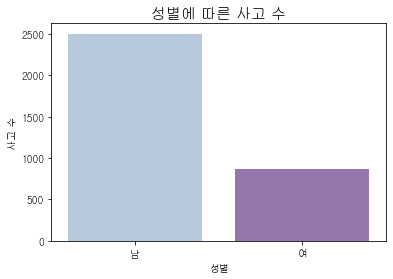

In [ ]:
sns.set_palette("pastel")
sns.barplot(x="index", y="피해운전자 성별", data=sex, alpha=0.9, palette="BuPu")
plt.title("성별에 따른 사고 수", fontsize = "15")
plt.xlabel("성별")
plt.ylabel("사고 수")
plt.show()

### 2-10-2. 서구 전체 거주자 

In [ ]:
서구_거주자_성별 = pd.DataFrame({'성별':['남','여'],
                         '인원수':[83659,83611]})

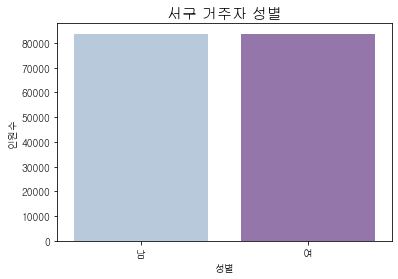

In [ ]:
sns.set_palette("pastel")
sns.barplot(x="성별", y="인원수", data=서구_거주자_성별, alpha=0.9, palette="BuPu")
plt.title("서구 거주자 성별", fontsize = "15")
plt.xlabel("성별")
plt.ylabel("인원수")
plt.show()

# 3. 연령대에 맞는 EDA

In [ ]:
data

,사고번호,사고일시,사고연도,사고월,사고시간,요일,시군구,사고내용,사망자수,중상자수,...,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,피해운전자 연령층,가해운전자 연령층
0,2018010200100023,2018년 1월 2일 02시,2018,1,2,화요일,대구광역시 서구 내당동,경상사고,0,0,...,승용,남,60,상해없음,승용,남,56,경상,장년,장년
1,2018010200100127,2018년 1월 2일 09시,2018,1,9,화요일,대구광역시 서구 평리동,경상사고,0,0,...,승용,남,64,상해없음,승합,남,61,상해없음,장년,장년
2,2018010200100240,2018년 1월 2일 13시,2018,1,13,화요일,대구광역시 서구 비산동,중상사고,0,1,...,승용,남,58,상해없음,보행자,남,60,중상,장년,장년
3,2018010200100292,2018년 1월 2일 15시,2018,1,15,화요일,대구광역시 서구 내당동,경상사고,0,0,...,승용,여,62,상해없음,승용,여,57,경상,장년,장년
4,2018010200100386,2018년 1월 2일 18시,2018,1,18,화요일,대구광역시 서구 중리동,경상사고,0,0,...,이륜,남,18,부상신고,승용,남,62,경상,장년,청소년
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3581,2020123100100304,2020년 12월 31일 16시,2020,12,16,목요일,대구광역시 서구 평리동,경상사고,0,0,...,승용,남,30,상해없음,보행자,여,8,경상,아동,중년
3582,2020123100100305,2020년 12월 31일 16시,2020,12,16,목요일,대구광역시 서구 이현동,경상사고,0,0,...,화물,남,32,부상신고,승용,남,40,경상,중년,중년
3583,2020123100100363,2020년 12월 31일 17시,2020,12,17,목요일,대구광역시 서구 비산동,경상사고,0,0,...,승용,남,64,상해없음,자전거,여,65,경상,노년,장년
3584,2020123100100483,2020년 12월 31일 19시,2020,12,19,목요일,대구광역시 서구 평리동,경상사고,0,0,...,승용,남,71,경상,승용,남,30,경상,중년,노년


In [ ]:
data["사고유형"] # '차대사람'을 대상으로 찾기

0              차대차 - 측면충돌
1                차대차 - 추돌
2       차대사람 - 길가장자리구역통행중
3              차대차 - 측면충돌
4              차대차 - 측면충돌
              ...        
3581         차대사람 - 차도통행중
3582           차대차 - 측면충돌
3583           차대차 - 측면충돌
3584           차대차 - 측면충돌
3585           차대차 - 측면충돌
Name: 사고유형, Length: 3373, dtype: object

In [ ]:
# data['피해운전자 연령층']

In [ ]:
type = data["사고유형"]
type.describe()
type.unique()

array(['차대차 - 측면충돌', '차대차 - 추돌', '차대사람 - 길가장자리구역통행중', '차대차 - 기타',
       '차대사람 - 차도통행중', '차대사람 - 횡단중', '차대사람 - 기타', '차대사람 - 보도통행중',
       '차대차 - 정면충돌', '차대차 - 후진중충돌'], dtype=object)

In [ ]:
# 차대차 / 차대사람 나누기
type = type.replace(["차대차 - 측면충돌","차대차 - 추돌", "차대차 - 기타", "차대차 - 정면충돌", "차대차 - 후진중충돌"], "차대차")
type = type.replace(["차대사람 - 기타", "차대사람 - 횡단중", "차대사람 - 차도통행중", "차대사람 - 보도통행중", "차대사람 - 길가장자리구역통행중"], "차대사람")
type = type.replace(["차량단독 - 전도전복 - 전도"], "차량단독")
k2 = type.value_counts()
k2

차대차     2771
차대사람     602
Name: 사고유형, dtype: int64

In [ ]:
data['타입'] = type
data['타입']

0        차대차
1        차대차
2       차대사람
3        차대차
4        차대차
        ... 
3581    차대사람
3582     차대차
3583     차대차
3584     차대차
3585     차대차
Name: 타입, Length: 3373, dtype: object

### 3-1. 연령층에 따른 사고 타입(차대차/차대사람)

<AxesSubplot:xlabel='피해운전자 연령층', ylabel='count'>

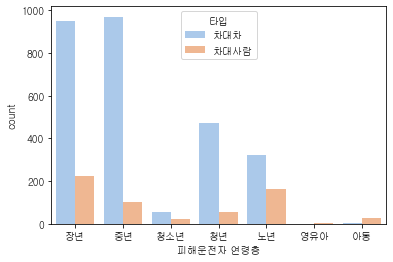

In [ ]:
sns.countplot(x='피해운전자 연령층',hue='타입',data=data)

### 3-2. 거주인원대비 사고 연령대

In [ ]:
stay_pd

,연령층,서구_int
0,노년,39131
1,아동,6254
2,영유아,3582
3,장년,50852
4,중년,38995
5,청년,22160
6,청소년,6296


In [ ]:
data['피해운전자 연령층'].value_counts()
피해운전자_연령층

,연령층,연령층 수
0,장년,1172
1,중년,1074
2,청년,525
3,노년,486
4,청소년,78
5,아동,34
6,영유아,4


In [ ]:
피해운전자_연령층

,연령층,연령층 수
0,장년,1172
1,중년,1074
2,청년,525
3,노년,486
4,청소년,78
5,아동,34
6,영유아,4


In [ ]:
accident = pd.merge(stay_pd,피해운전자_연령층,on='연령층')
accident

,연령층,서구_int,연령층 수
0,노년,39131,486
1,아동,6254,34
2,영유아,3582,4
3,장년,50852,1172
4,중년,38995,1074
5,청년,22160,525
6,청소년,6296,78


<AxesSubplot:xlabel='서구_int', ylabel='count'>

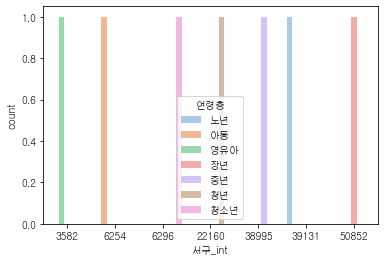

In [ ]:
sns.countplot(x='서구_int',hue='연령층',data=accident)

-------------------------------------------------- 이거 다시해야함 -----------------------------------------------------

### 3-3. 피해운전자(노년), 차대보행자일 때 교통사고 이유

In [ ]:
k2

차대차     2771
차대사람     602
Name: 사고유형, dtype: int64

In [ ]:
data.rename(columns={'피해운전자 연령층':'피해운전자연령층'},inplace=True)

In [ ]:
# data.query('타입 == "차대사람" and 피해운전자 연령층 == "노년"')['법규위반']
data.query('피해운전자연령층 == "노년"')['법규위반']

23      안전운전불이행
38      안전거리미확보
40         신호위반
45           기타
52      안전운전불이행
         ...   
3562       신호위반
3564    안전운전불이행
3572         기타
3580    안전운전불이행
3583    안전운전불이행
Name: 법규위반, Length: 486, dtype: object

In [ ]:
data.query('타입 == "차대사람" and 피해운전자연령층 == "노년"')['법규위반'].value_counts()

안전운전불이행      104
기타            25
보행자보호의무위반     20
신호위반          12
중앙선침범          1
교차로운행방법위반      1
과속             1
Name: 법규위반, dtype: int64

In [ ]:
시간대_사고수 = pd.DataFrame({'법규위반':['안전운전불이행','보행자보호의무위반','신호위반','중앙선침범','교차로운행방법위반','과속','기타'],
                         '사고 수':[104,20,12,1,1,1,25]})

In [ ]:
시간대_사고수

,법규위반,사고 수
0,안전운전불이행,104
1,보행자보호의무위반,20
2,신호위반,12
3,중앙선침범,1
4,교차로운행방법위반,1
5,과속,1
6,기타,25


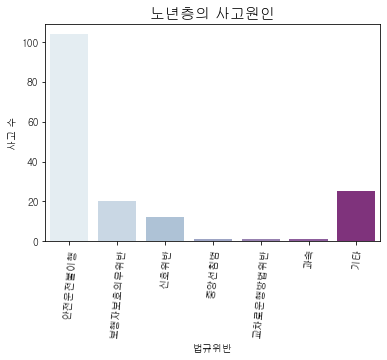

In [ ]:
sns.set_palette("pastel")
sns.barplot(x="법규위반", y="사고 수", data=시간대_사고수, alpha=0.9, palette="BuPu")
plt.title("노년층의 사고원인", fontsize = "15")
plt.xlabel("법규위반")
plt.ylabel("사고 수")
plt.xticks(rotation = 85)
plt.show()

- 안전운전불이행이 가장 많게 나타남  

- 안전운전불이행 : 휴대전화, 라디오 조작, 졸음운전으로 인한 전방 주시 태만 사고, 제동장치 조작 불량 사고,  
핸들 과대조작 사고, 차내 잡답 혹은 장난으로 인한 사고, 운전미숙으로 인한 사고, 난폭운전  
  
- 보행자보호의무위반 : 보행자가 횡단보도를 통행할 때 횡단을 방해하거나 위험을 주지 않도록 하는 것,  
신호를 늦게 발견해 정지선을 넘어 차체가 횡단보도 위에 정지하는 경우

1. 횡단보도가 후보가 될 것이고 (이것에 대한 좌표가 있어야함)  
1-2. 이미 지정되어있는 공간은 제외해야함, 노인보호구역의 조건이 무엇일까  
1-3. 그린존의 조건 (차선의 조건)   
1-4. 노인 사고 지역 찍어보고 이유 알아보기   
2. 사고 다발, 통행량이 많은 곳
3. 서구에 노인 시설, 요양 시설을 알아본다 (군집 분석-각 구역별로 특징을 알아봐야한다)
4. 높은 요인을 알아본다음에 회귀분석을 한다 / 회귀분석의 y는 ? 발생건수 예상 (구역 예상) - 높은 곳에 설치하겠다 
5. 높은 곳에 GIS를 입력한다  

노인이 왜 사고가 나는지 (구역, 원인)  
횡단보도에서 사고나는지?  

발생건수와 사망사고의 상관관계  

# 3. 목표사고(사망+중상) 수와 요인들의 상관분석

In [ ]:
reason = pd.read_excel('C:/Users/user/Desktop/모델링도전.xlsx')
reason

,동,사망자수,중상자수,경상자수,부상신고자수,목표사고,총사고,게이트장,노인복지시설,노인교실,경로당,의료기관,전통시장,목욕탕,생활체육
0,내당동,3,15,19,3,18,40,2,11,2,19,3,1,9,2
1,비산동,3,38,28,6,41,75,1,11,1,23,1,3,9,21
2,상리동,1,1,0,0,2,2,0,7,1,2,0,0,0,6
3,원대동,1,5,1,1,6,8,0,4,1,5,0,1,3,5
4,이현동,0,0,0,0,0,0,1,1,0,0,0,0,0,5
5,중리동,0,4,4,0,4,8,1,4,1,9,1,0,2,1
6,평리동,4,17,16,2,21,39,1,23,4,22,5,7,13,2


In [ ]:
reason.drop('동',axis=1,inplace=True)
reason.drop('사망자수',axis=1,inplace=True)
reason.drop('중상자수',axis=1,inplace=True)
reason.drop('경상자수',axis=1,inplace=True)
reason.drop('부상신고자수',axis=1,inplace=True)
reason.drop('총사고',axis=1,inplace=True)

In [ ]:
corr = reason.corr(method = 'pearson')
corr[0:1]

,목표사고,게이트장,노인복지시설,노인교실,경로당,의료기관,전통시장,목욕탕,생활체육
목표사고,1.0,0.380781,0.596124,0.370949,0.892035,0.433129,0.603628,0.787437,0.714584


**=> 65세 이상 총사고 수와 경로당(0.89), 목욕탕(0.78), 노인복지시설(0.37) 순으로 상관 관계를 가지고있다.**
- -1.0과 -0.7 사이이면, 강한 음적 선형관계  
- -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계  
- -0.3과 -0.1 사이이면, 약한 음적 선형관계  
- -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계  
- +0.1과 +0.3 사이이면, 약한 양적 선형관계  
- +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계  
- +0.7과 +1.0 사이이면, 강한 양적 선형관계

In [ ]:
corr.style.background_gradient(cmap = 'coolwarm', axis = None)

,목표사고,게이트장,노인복지시설,노인교실,경로당,의료기관,전통시장,목욕탕,생활체육
목표사고,1.000000,0.380781,0.596124,0.370949,0.892035,0.433129,0.603628,0.787437,0.714584
게이트장,0.380781,1.000000,0.287557,0.271163,0.580699,0.562244,0.161515,0.523031,-0.105316
노인복지시설,0.596124,0.287557,1.000000,0.945923,0.796529,0.907991,0.927623,0.899624,0.013239
노인교실,0.370949,0.271163,0.945923,1.000000,0.681705,0.944267,0.861337,0.829140,-0.285579
경로당,0.892035,0.580699,0.796529,0.681705,1.000000,0.761650,0.732984,0.949255,0.325674
의료기관,0.433129,0.562244,0.907991,0.944267,0.761650,1.000000,0.815343,0.878078,-0.280150
전통시장,0.603628,0.161515,0.927623,0.861337,0.732984,0.815343,1.000000,0.862822,0.113401
목욕탕,0.787437,0.523031,0.899624,0.829140,0.949255,0.878078,0.862822,1.000000,0.160072
생활체육,0.714584,-0.105316,0.013239,-0.285579,0.325674,-0.280150,0.113401,0.160072,1.000000


# +) 사망 사고 수와 요인들의 상관분석

In [ ]:
dead = pd.read_excel('C:/Users/user/Desktop/모델링도전.xlsx')
dead

,동,사망자수,중상자수,경상자수,부상신고자수,목표사고,총사고,게이트장,노인복지시설,노인교실,경로당,의료기관,전통시장,목욕탕,생활체육
0,내당동,12,257,668,71,269,1008,2,11,2,19,3,1,9,2
1,비산동,8,280,629,95,288,1012,1,11,1,23,1,3,9,21
2,상리동,7,13,46,3,20,69,0,7,1,2,0,0,0,6
3,원대동,1,52,64,10,53,127,0,4,1,5,0,1,3,5
4,이현동,1,40,157,16,41,214,1,1,0,0,0,0,0,5
5,중리동,2,63,137,20,65,222,1,4,1,9,1,0,2,1
6,평리동,2,237,607,88,239,934,1,23,4,22,5,7,13,2


In [ ]:
dead.drop('총사고',axis=1,inplace=True)
dead.drop('중상자수',axis=1,inplace=True)
dead.drop('경상자수',axis=1,inplace=True)
dead.drop('부상신고자수',axis=1,inplace=True)

In [ ]:
corr = dead.corr(method = 'pearson')
corr[0:1]

,사망자수,게이트장,노인복지시설,노인교실,경로당,의료기관,전통시장,목욕탕,생활체육
사망자수,1.0,0.488391,0.213623,0.086842,0.459829,0.180062,-0.084055,0.325344,0.292311


In [ ]:
corr.style.background_gradient(cmap = 'coolwarm', axis = None)

,사망자수,게이트장,노인복지시설,노인교실,경로당,의료기관,전통시장,목욕탕,생활체육
사망자수,1.000000,0.488391,0.213623,0.086842,0.459829,0.180062,-0.084055,0.325344,0.292311
게이트장,0.488391,1.000000,0.287557,0.271163,0.580699,0.562244,0.161515,0.523031,-0.105316
노인복지시설,0.213623,0.287557,1.000000,0.945923,0.796529,0.907991,0.927623,0.899624,0.013239
노인교실,0.086842,0.271163,0.945923,1.000000,0.681705,0.944267,0.861337,0.829140,-0.285579
경로당,0.459829,0.580699,0.796529,0.681705,1.000000,0.761650,0.732984,0.949255,0.325674
의료기관,0.180062,0.562244,0.907991,0.944267,0.761650,1.000000,0.815343,0.878078,-0.280150
전통시장,-0.084055,0.161515,0.927623,0.861337,0.732984,0.815343,1.000000,0.862822,0.113401
목욕탕,0.325344,0.523031,0.899624,0.829140,0.949255,0.878078,0.862822,1.000000,0.160072
생활체육,0.292311,-0.105316,0.013239,-0.285579,0.325674,-0.280150,0.113401,0.160072,1.000000


# 5. 회귀분석

In [ ]:
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

In [ ]:
test = pd.read_excel('C:/Users/user/Desktop/모델링도전.xlsx')
test = test[:7]
test

,동,사망자수,중상자수,경상자수,부상신고자수,목표사고,총사고,게이트장,노인복지시설,노인교실,경로당,의료기관,전통시장,목욕탕,생활체육
0,내당동,3,15,19,3,18,40,2,11,2,19,3,1,9,2
1,비산동,3,38,28,6,41,75,1,11,1,23,1,3,9,21
2,상리동,1,1,0,0,2,2,0,7,1,2,0,0,0,6
3,원대동,1,5,1,1,6,8,0,4,1,5,0,1,3,5
4,이현동,0,0,0,0,0,0,1,1,0,0,0,0,0,5
5,중리동,0,4,4,0,4,8,1,4,1,9,1,0,2,1
6,평리동,4,17,16,2,21,39,1,23,4,22,5,7,13,2


In [ ]:
y = test['목표사고']
X = test[['게이트장','노인복지시설','노인교실','경로당','의료기관','전통시장','목욕탕','생활체육']]

In [ ]:
# from sklearn.model_selection import train_test_split

In [ ]:
# train_x, test_x, train_y, test_y = train_test_split(X,y, train_size = 0.7, test_size = 0.3)

# print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

In [ ]:
# lm = LinearRegression()
# y = test['총사고']
# x = test[['게이트장','노인복지시설','노인교실','경로당','의료기관','전통시장','목욕탕','생활체육']]
# lm_result = lm,fit(x,y)
# Y_pred = lm.predict
# lm_result.summary()

In [ ]:
model =  ols('목표사고 ~ 게이트장+ 노인복지시설 + 노인교실 + 경로당 + 의료기관 + 전통시장 + 목욕탕 +  생활체육',
             data = test).fit()
model.summary()

C:\Users\user\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\user\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1650: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   목표사고   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 16 Aug 2021   Prob (F-statistic):                nan
Time:                        12:40:19   Log-Likelihood:                 208.50
No. Observations:                   7   AIC:                            -403.0
Df Residuals:                       0   BIC:                            -403.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.7647        inf         -0        nan         nan         nan
게이트장          -1.1324        inf         -0        nan         nan         nan
노인복지시설         0.0497        inf          0        nan         nan         nan
노인교실          -1.9913        inf         -0        nan         nan         nan
경로당            0.7957        inf          0        nan         nan         nan
의료기관           0.4880        inf          0        nan         nan         nan
전통시장          -0.3752        inf         -0        nan         nan         nan
목욕탕            1.0356        inf          0        nan         nan         nan
생활체육           0.9695        inf          0        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.378
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.747
Skew:                           0.434   Prob(JB):                        0.688
Kurtosis:                       1.656   Cond. No.                         53.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The input rank is higher than the number of observations.
"""

In [ ]:
# VIF 계산
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
test

,동,사망자수,중상자수,경상자수,부상신고자수,목표사고,총사고,게이트장,노인복지시설,노인교실,경로당,의료기관,전통시장,목욕탕,생활체육
0,내당동,3,15,19,3,18,40,2,11,2,19,3,1,9,2
1,비산동,3,38,28,6,41,75,1,11,1,23,1,3,9,21
2,상리동,1,1,0,0,2,2,0,7,1,2,0,0,0,6
3,원대동,1,5,1,1,6,8,0,4,1,5,0,1,3,5
4,이현동,0,0,0,0,0,0,1,1,0,0,0,0,0,5
5,중리동,0,4,4,0,4,8,1,4,1,9,1,0,2,1
6,평리동,4,17,16,2,21,39,1,23,4,22,5,7,13,2


In [ ]:
# vif_test = test.drop('동',axis=1,inplace=True)
vif_test = test.iloc[:,5]

In [ ]:
vif_test

0    18
1    41
2     2
3     6
4     0
5     4
6    21
Name: 목표사고, dtype: int64

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    dfX.values, i) for i in range(dfX.shape[1])]
vif["features"] = dfX.columns
vif

NameError: name 'dfX' is not defined

In [ ]:
vif = pd.DataFrame(
    [variance_inflation_factor(vif_test.values, i) for i in range(vif_test.shape[1])],
    index=vif_test.columns, columns=['VIF'])
vif.sort_values(by='VIF', ascending=False)

### ---------------------------------------------------------------------------------------------------------------------------------------------------
### ---------------------------------------------------------------------------------------------------------------------------------------------------


# 6-1. 최종 모델링 도전

In [ ]:
model = pd.read_csv('C:/Users/user/Desktop/최종모델링도전.csv',encoding='euc-kr')
model

,id,left,top,right,bottom,경찰서,게이트장,경로당,노인교실,복지시설,목욕장,중상자 수,전통시장,의료기관,사망자 수,CCTV,생활체육,총사고
0,53,1094237.478,1766068.861,1094737.478,1765568.861,0,0,0,0,0,0,0,0,0,0,0,0,0
1,52,1094237.478,1766568.861,1094737.478,1766068.861,0,0,0,0,0,0,0,0,1,0,0,0,0
2,55,1094237.478,1765068.861,1094737.478,1764568.861,0,0,1,0,0,1,0,0,0,0,0,0,0
3,54,1094237.478,1765568.861,1094737.478,1765068.861,0,0,1,0,0,0,0,0,0,0,0,1,0
4,49,1093737.478,1763068.861,1094237.478,1762568.861,0,0,1,1,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,47,1093737.478,1764068.861,1094237.478,1763568.861,0,0,0,0,0,0,0,0,0,0,0,0,0
89,46,1093737.478,1764568.861,1094237.478,1764068.861,0,0,0,0,0,0,0,0,0,0,0,1,0
90,41,1093737.478,1767068.861,1094237.478,1766568.861,0,0,0,0,0,0,0,0,0,0,0,0,0
91,43,1093737.478,1766068.861,1094237.478,1765568.861,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
model.drop('id',axis=1,inplace=True)
model.drop('left',axis=1,inplace=True)
model.drop('top',axis=1,inplace=True)
model.drop('right',axis=1,inplace=True)
model.drop('bottom',axis=1,inplace=True)
model.drop('사망자 수',axis=1,inplace=True)
model.drop('중상자 수',axis=1,inplace=True)

In [ ]:
model

,경찰서,게이트장,경로당,노인교실,복지시설,목욕장,전통시장,의료기관,CCTV,생활체육,총사고
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,1,0
4,0,0,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
88,0,0,0,0,0,0,0,0,0,0,0
89,0,0,0,0,0,0,0,0,0,1,0
90,0,0,0,0,0,0,0,0,0,0,0
91,0,0,0,0,0,0,0,0,0,0,0


### 6-1-2. 상관관계

In [ ]:
corr = model.corr(method = 'pearson')
corr[-1:]

,경찰서,게이트장,경로당,노인교실,복지시설,목욕장,전통시장,의료기관,CCTV,생활체육,총사고
총사고,0.35409,-0.008396,0.463592,0.131297,0.242319,0.344236,0.097667,0.465826,0.478299,0.592554,1.0


**생활체육(0.59) > CCTV(0.47) > 의료기관(0.46) > 경로당(0.46) > 경찰서(0.35)**
- 목욕장 36개
- 경찰서 12개
- 전통시장 9개
- 의료기관 260개
- 게이트볼 7개
- 체육시설 42개
- 노인교실 10개 
- CCTV 34개
- 사망자 33명
- 중상자 81명

In [ ]:
corr.style.background_gradient(cmap = 'coolwarm', axis = None)

,경찰서,게이트장,경로당,노인교실,복지시설,목욕장,전통시장,의료기관,CCTV,생활체육,총사고
경찰서,1.000000,0.027010,0.060509,0.232327,0.076322,0.418836,0.282156,0.462524,0.155114,0.300726,0.354090
게이트장,0.027010,1.000000,0.204204,0.045314,0.002344,0.111858,0.062082,0.106539,0.371299,0.017154,-0.008396
경로당,0.060509,0.204204,1.000000,0.286198,0.467807,0.498305,0.416150,0.420691,0.373018,0.286403,0.463592
노인교실,0.232327,0.045314,0.286198,1.000000,0.063561,0.245160,0.109538,0.330128,0.244949,0.020493,0.131297
복지시설,0.076322,0.002344,0.467807,0.063561,1.000000,0.426797,0.334987,0.402235,0.074310,0.150022,0.242319
목욕장,0.418836,0.111858,0.498305,0.245160,0.426797,1.000000,0.693539,0.480216,0.187617,0.215448,0.344236
전통시장,0.282156,0.062082,0.416150,0.109538,0.334987,0.693539,1.000000,0.249081,0.037709,0.144125,0.097667
의료기관,0.462524,0.106539,0.420691,0.330128,0.402235,0.480216,0.249081,1.000000,0.398633,0.225673,0.465826
CCTV,0.155114,0.371299,0.373018,0.244949,0.074310,0.187617,0.037709,0.398633,1.000000,0.204547,0.478299
생활체육,0.300726,0.017154,0.286403,0.020493,0.150022,0.215448,0.144125,0.225673,0.204547,1.000000,0.592554


In [ ]:
corr[-1:]

,경찰서,게이트장,경로당,노인교실,복지시설,목욕장,전통시장,의료기관,CCTV,생활체육,총사고
총사고,0.35409,-0.008396,0.463592,0.131297,0.242319,0.344236,0.097667,0.465826,0.478299,0.592554,1.0


**낮은 상관관계를 보이는 아래의 세 가지 요인을 제외할 것이다**
- 게이트장
- 노인교실
- 전통시장

### 6-1-3. 다중공선성

In [ ]:
vif = []
model_val = model.values
for i in range(len(model.columns)):
    vif.append(variance_inflation_factor(model.values, i))
vif

[1.9733925419526215,
 1.3867634278990857,
 3.347075853285828,
 1.4017902257166845,
 1.9565121351684664,
 3.706111568096334,
 2.4762710775244576,
 2.7163825471092347,
 2.2777646028309952,
 2.1597963571842103,
 3.8775743315406492]

In [ ]:
다중공선성=pd.DataFrame({'요인':['경찰서','게이트장','경로당','노인교실','복지시설','목욕장','전통시장','의료기관','CCTV','생활체육', '총사고'],
                         'vif':[1.9733925419526215,1.3867634278990857,3.347075853285828,1.4017902257166845,1.9565121351684664,3.706111568096334,
                                  2.4762710775244576,2.7163825471092347, 2.2777646028309952,2.1597963571842103,3.8775743315406492]})
np.transpose(다중공선성)

,0,1,2,3,4,5,6,7,8,9,10
요인,경찰서,게이트장,경로당,노인교실,복지시설,목욕장,전통시장,의료기관,CCTV,생활체육,총사고
vif,1.973393,1.386763,3.347076,1.40179,1.956512,3.706112,2.476271,2.716383,2.277765,2.159796,3.877574


- vif < 10 (일반적)
- vif < 5 (엄격)
- vif < 15~20 (느슨하게)  

**다중공성성 엄격한 기준으로 서로 간의 상관관계가 없다고 보인다**

### 6-1-4. 회귀모델 1

In [ ]:
test1 =  ols('총사고 ~ CCTV + 경찰서 + 게이트장+ 복지시설 + 노인교실 + 경로당 + 의료기관 + 전통시장 + 목욕장 +  생활체육',
             data = model).fit()
test1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    총사고   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     13.91
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           5.40e-14
Time:                        12:40:23   Log-Likelihood:                -143.05
No. Observations:                  93   AIC:                             308.1
Df Residuals:                      82   BIC:                             336.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0381      0.170      0.223      0.824      -0.301       0.377
CCTV           0.8338      0.225      3.702      0.000       0.386       1.282
경찰서            0.7669      0.443      1.733      0.087      -0.114       1.647
게이트장          -1.5088      0.554     -2.725      0.008      -2.610      -0.407
복지시설          -0.0087      0.128     -0.068      0.946      -0.264       0.247
노인교실          -0.5807      0.406     -1.431      0.156      -1.388       0.226
경로당            0.4100      0.145      2.836      0.006       0.122       0.698
의료기관           0.0423      0.037      1.131      0.261      -0.032       0.117
전통시장          -1.5552      0.607     -2.563      0.012      -2.762      -0.348
목욕장            0.4937      0.311      1.586      0.117      -0.126       1.113
생활체육           0.9631      0.187      5.139      0.000       0.590       1.336
==============================================================================
Omnibus:                       17.151   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.437
Skew:                           0.813   Prob(JB):                     3.00e-06
Kurtosis:                       4.979   Cond. No.                         29.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 귀무가설 : 회귀계수는 유의하지않다    
- 대립가설 : 회귀계수는 유의하다  

**경찰서, 노인교실, 의료기관, 목욕장은 유의수준 0.05에서 귀무가설을 기각한다.**    
**즉, 위의 네 가지 요인은 제하고 알아본다.**

In [ ]:
test22 =  ols('총사고 ~ CCTV  + 게이트장+ 복지시설 + 경로당  + 전통시장  +  생활체육',
             data = model).fit()
test22.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    총사고   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     18.71
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           8.35e-14
Time:                        12:40:24   Log-Likelihood:                -150.34
No. Observations:                  93   AIC:                             314.7
Df Residuals:                      86   BIC:                             332.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1196      0.177      0.675      0.501      -0.233       0.472
CCTV           0.9868      0.224      4.414      0.000       0.542       1.431
게이트장          -1.4793      0.582     -2.544      0.013      -2.635      -0.323
복지시설           0.0973      0.126      0.770      0.443      -0.154       0.348
경로당            0.3684      0.141      2.621      0.010       0.089       0.648
전통시장          -0.5833      0.501     -1.165      0.247      -1.579       0.412
생활체육           1.1352      0.187      6.065      0.000       0.763       1.507
==============================================================================
Omnibus:                        7.819   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                8.734
Skew:                           0.467   Prob(JB):                       0.0127
Kurtosis:                       4.176   Cond. No.                         9.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 6-2. 게이트장, 노인교실, 전통시장은 제외한 회귀분석

In [ ]:
test3 =  ols('총사고 ~ CCTV + 경찰서 + 복지시설 + 경로당 + 의료기관 + 목욕장 +  생활체육',
             data = model).fit()
test3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    총사고   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     15.51
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           6.25e-13
Time:                        12:40:24   Log-Likelihood:                -150.90
No. Observations:                  93   AIC:                             317.8
Df Residuals:                      85   BIC:                             338.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0321      0.181      0.177      0.860      -0.328       0.392
CCTV           0.6811      0.225      3.027      0.003       0.234       1.128
경찰서            0.5712      0.466      1.225      0.224      -0.356       1.498
복지시설           0.0207      0.136      0.153      0.879      -0.249       0.290
경로당            0.2665      0.148      1.806      0.074      -0.027       0.560
의료기관           0.0546      0.039      1.397      0.166      -0.023       0.132
목욕장           -0.0074      0.273     -0.027      0.978      -0.550       0.535
생활체육           1.0570      0.197      5.361      0.000       0.665       1.449
==============================================================================
Omnibus:                       13.933   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.885
Skew:                           0.771   Prob(JB):                     0.000216
Kurtosis:                       4.407   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
renew =  ols('총사고 ~ CCTV + 경찰서 + 복지시설 + 경로당 + 의료기관 + 전통시장 +  생활체육',
             data = model).fit()
renew.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    총사고   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     16.77
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           1.01e-13
Time:                        12:40:24   Log-Likelihood:                -148.83
No. Observations:                  93   AIC:                             313.7
Df Residuals:                      85   BIC:                             333.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0260      0.176      0.147      0.883      -0.325       0.377
CCTV           0.6190      0.222      2.791      0.006       0.178       1.060
경찰서            0.8263      0.444      1.860      0.066      -0.057       1.710
복지시설           0.0606      0.131      0.462      0.646      -0.201       0.322
경로당            0.3674      0.144      2.551      0.013       0.081       0.654
의료기관           0.0500      0.038      1.315      0.192      -0.026       0.126
전통시장          -1.0263      0.521     -1.971      0.052      -2.062       0.009
생활체육           1.0370      0.193      5.377      0.000       0.654       1.421
==============================================================================
Omnibus:                       14.977   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.339
Skew:                           0.785   Prob(JB):                     6.32e-05
Kurtosis:                       4.589   Cond. No.                         24.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

복지시설, 의료기관 삭제하기

In [ ]:
renew =  ols('총사고 ~ CCTV + 경찰서 + 경로당 + 전통시장 +  생활체육',
             data = model).fit()
renew.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    총사고   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     22.81
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           1.48e-14
Time:                        12:40:25   Log-Likelihood:                -150.22
No. Observations:                  93   AIC:                             312.4
Df Residuals:                      87   BIC:                             327.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0702      0.173      0.405      0.687      -0.274       0.415
CCTV           0.6832      0.212      3.226      0.002       0.262       1.104
경찰서            1.1011      0.396      2.780      0.007       0.314       1.888
경로당            0.4555      0.131      3.477      0.001       0.195       0.716
전통시장          -0.9972      0.516     -1.933      0.057      -2.023       0.028
생활체육           1.0265      0.193      5.314      0.000       0.643       1.410
==============================================================================
Omnibus:                       14.203   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.901
Skew:                           0.760   Prob(JB):                     0.000130
Kurtosis:                       4.520   Cond. No.                         7.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 이 모델을 선택할 것

In [ ]:
renew =  ols('총사고 ~ CCTV + 경찰서 + 경로당 + 생활체육',
             data = model).fit()
renew.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    총사고   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     26.75
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           1.57e-14
Time:                        12:40:25   Log-Likelihood:                -152.17
No. Observations:                  93   AIC:                             314.3
Df Residuals:                      88   BIC:                             327.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0674      0.176      0.383      0.703      -0.282       0.417
CCTV           0.7593      0.211      3.593      0.001       0.339       1.179
경찰서            0.8641      0.382      2.260      0.026       0.104       1.624
경로당            0.3418      0.119      2.876      0.005       0.106       0.578
생활체육           1.0443      0.196      5.330      0.000       0.655       1.434
==============================================================================
Omnibus:                       13.133   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.740
Skew:                           0.735   Prob(JB):                     0.000382
Kurtosis:                       4.379   Cond. No.                         5.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### y = 0.0674 + 0.7593*CCTV + 0.8641*경찰서 + 0.3418*경로당 + 1.0443*생활체육

- 귀무가설 : beta1=beta2=...=betak=0  
- 대립가설 : beta1=beta2=...=betak not= 0이다  
- 모든 회귀계수가 유의수준 0.05에서 귀무가설을 기각한다.  
- 즉, 모든 회귀계수가 유의하다고 할 수 있다.  
- No. Observations: Number of observations, 관찰표본 수, 즉 총 표본 수 93개를 뜻한다. 
- Df Residuals: DF는 Degree of Freedom으로 자유도, 전체 표본 수 93개 - 종속변수1개 - 독립변수4개 = 88  
- Df Model: 독립변수의 개수=4  

- Durbin-Watson : 잔차의 독립성 확인  
    0 : 양의 자기상관, 2 : 자기상관이 없는 독립성, 4 : 음의 자기상관  
    보통 1.5~2.5이면 독립으로 판단  

### (1) 모형의 선형성

In [ ]:
fitted = renew.predict(renew)
residual = renew['총사고'] - fitted

plt.rcParams["figure.figsize"] = (10, 10)
sns.regplot(fitted, residual, lowess=True, line_kws={'color': 'red'})
plt.plot([fitted.min(), fitted.max()], [0, 0], '--', color='grey')

TypeError: object of type 'RegressionResultsWrapper' has no len()

# 7. 관공서 추가한 회귀분석

In [ ]:
official = pd.read_csv('C:/Users/user/Desktop/서구 500 grid(1).csv',encoding='euc-kr')
official

,id,left,top,right,bottom,CCTV,게이트볼,노인교실,복지시설,경로당,목욕장,사망자 수,중상자 수,의료기관,경찰서,관공서,전통시장,총사고
0,53,1094237.478,1766068.861,1094737.478,1765568.861,0,0,0,0,0,0,0,0,0,0,0,0,0
1,52,1094237.478,1766568.861,1094737.478,1766068.861,0,0,0,0,0,0,0,0,1,0,0,0,0
2,55,1094237.478,1765068.861,1094737.478,1764568.861,0,0,0,0,1,1,0,0,0,0,0,0,0
3,54,1094237.478,1765568.861,1094737.478,1765068.861,0,0,0,0,1,0,0,0,0,0,1,0,0
4,49,1093737.478,1763068.861,1094237.478,1762568.861,0,0,1,0,1,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,47,1093737.478,1764068.861,1094237.478,1763568.861,0,0,0,0,0,0,0,0,0,0,0,0,0
89,46,1093737.478,1764568.861,1094237.478,1764068.861,0,0,0,0,0,0,0,0,0,0,0,0,0
90,41,1093737.478,1767068.861,1094237.478,1766568.861,0,0,0,0,0,0,0,0,0,0,0,0,0
91,43,1093737.478,1766068.861,1094237.478,1765568.861,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
official.drop('id',axis=1,inplace=True)
official.drop('left',axis=1,inplace=True)
official.drop('top',axis=1,inplace=True)
official.drop('right',axis=1,inplace=True)
official.drop('bottom',axis=1,inplace=True)
official.drop('사망자 수',axis=1,inplace=True)
official.drop('중상자 수',axis=1,inplace=True)

In [ ]:
official

,CCTV,게이트볼,노인교실,복지시설,경로당,목욕장,의료기관,경찰서,관공서,전통시장,총사고
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,1,0,0
4,0,0,1,0,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
88,0,0,0,0,0,0,0,0,0,0,0
89,0,0,0,0,0,0,0,0,0,0,0
90,0,0,0,0,0,0,0,0,0,0,0
91,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
corr = official.corr(method = 'pearson')
corr[-1:]

,CCTV,게이트볼,노인교실,복지시설,경로당,목욕장,의료기관,경찰서,관공서,전통시장,총사고
총사고,0.478299,-0.008396,0.131297,0.242319,0.463592,0.344236,0.465826,0.35409,0.261176,0.097667,1.0


In [ ]:
vif = []
official_val = official.values
for i in range(len(official.columns)):
    vif.append(variance_inflation_factor(official.values, i))
vif

[2.2721846560852024,
 1.420987519730303,
 1.6071870504370636,
 2.0281012367013935,
 3.6506824367156985,
 3.7044146970745726,
 2.7423310683969153,
 2.4462925790581926,
 2.298360815933026,
 2.475040494359641,
 2.8698191190847613]

In [ ]:
test6 =  ols('총사고 ~ CCTV+게이트볼+노인교실+복지시설+경로당+목욕장+의료기관+경찰서+관공서+전통시장',
             data = official).fit()
test6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    총사고   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     8.530
Date:                Sun, 15 Aug 2021   Prob (F-statistic):           2.22e-09
Time:                        14:50:40   Log-Likelihood:                -156.01
No. Observations:                  93   AIC:                             334.0
Df Residuals:                      82   BIC:                             361.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2607      0.190      1.376      0.173      -0.116       0.638
CCTV           0.9569      0.258      3.707      0.000       0.443       1.470
게이트볼          -1.7368      0.645     -2.691      0.009      -3.021      -0.453
노인교실          -0.8660      0.496     -1.746      0.085      -1.853       0.121
복지시설           0.0054      0.150      0.036      0.972      -0.293       0.304
경로당            0.6054      0.169      3.578      0.001       0.269       0.942
목욕장            0.4784      0.359      1.333      0.186      -0.235       1.192
의료기관           0.0348      0.043      0.803      0.424      -0.051       0.121
경찰서            1.4791      0.554      2.672      0.009       0.378       2.580
관공서           -0.0936      0.468     -0.200      0.842      -1.024       0.836
전통시장          -1.6995      0.699     -2.430      0.017      -3.091      -0.308
==============================================================================
Omnibus:                       16.581   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.639
Skew:                           0.897   Prob(JB):                     3.30e-05
Kurtosis:                       4.452   Cond. No.                         29.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**=> 관공서는 문제가 있다고 판단해서 삭제**